In [1]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/machineHack/Workation Price Prediction Challenge/Participant_Data_WPPH.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [62]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
train=pd.read_csv("/content/Participant_Data_WPPH/Train.csv")
test = pd.read_csv('/content/Participant_Data_WPPH/Test.csv')
submission = pd.read_csv('/content/Participant_Data_WPPH/sample submission.csv')

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

In [65]:
train.isnull().sum()

Uniq Id                       0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
Per Person Price              0
dtype: int64

In [66]:
train['Travel Date'] = pd.to_datetime(train['Travel Date'])

In [67]:
train['Year']=pd.DatetimeIndex(train['Travel Date']).year
train['month']=pd.DatetimeIndex(train['Travel Date']).month


In [68]:
# select numerical and categorical features
def divideFeatures(train):
    numerical_features = train.select_dtypes(include=[np.number])
    categorical_features = train.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [69]:
continuous_data, categorical_data = divideFeatures(train)
categorical_data[:5]

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,Not Available,Mumbai,Not Available,Not Available,Not Available
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...


In [70]:
df_train = train.drop(columns=['Uniq Id'])
print('Shape',df_train.shape)
df_train.head(2)

Shape (21000, 16)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Year,month
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,2021,7
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,2021,8


In [71]:
continuous_data, categorical_data = divideFeatures(df_train)
categorical_data[:5]

,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,Not Available,Mumbai,Not Available,Not Available,Not Available
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...
3,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...
4,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...


In [72]:
continuous_data[:2]

,Flight Stops,Meals,Per Person Price,Year,month
0,2,3,11509.0,2021,7
1,0,5,22485.5,2021,8


In [73]:
#binary coding
yes_no_columns = ['Start City']

for column in yes_no_columns:
    df_train[column].replace({'Mumbai':1, 'New Delhi':0}, inplace=True)

In [74]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [75]:
label_columns=['Package Name','Package Type','Cancellation Rules','Hotel Details','Destination', 'Itinerary','Places Covered','Airline','Sightseeing Places Covered']

for label_column in label_columns:
    df_train[label_column] = lb.fit_transform(df_train[label_column])

For Label encoding:Cancellation Rules,Month,Year,Hotel Details ,Package Name,Package Type

In [76]:
#df_train = pd.get_dummies(data=df_train, columns = ['Destination', 'Itinerary','Places Covered','Airline','Sightseeing Places Covered'])

For Dummies: Destination,Itinerary,Places Covered,Hotel Details,Airline,Sightseeing Places Covered

In [77]:
#from sklearn.preprocessing import LabelEncoder
#lb = LabelEncoder()
#for col in categorical_data:
 # df_train[col] = lb.fit_transform(df_train[col])

In [78]:
print('Shape:',df_train.shape)
df_train.head(3)

Shape: (21000, 16)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Year,month
0,421,4,417,214,417,2021-07-30,3202,1,211,2,3,1713,5,11509.0,2021,7
1,1138,3,533,283,533,2021-08-12,5463,0,125,0,5,524,0,22485.5,2021,8
2,1417,2,549,700,549,2021-04-26,5092,0,114,0,4,1000,0,12421.5,2021,4


In [79]:
df_train['Per Person Price'] = np.log(df_train['Per Person Price'])

In [80]:
X = df_train.drop(columns=['Per Person Price','Travel Date'])
print('Shape:',X.shape)
X.head(2)

Shape: (21000, 14)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,421,4,417,214,417,3202,1,211,2,3,1713,5,2021,7
1,1138,3,533,283,533,5463,0,125,0,5,524,0,2021,8


In [81]:
#target variable Y
y=df_train['Per Person Price']
#print('Shape:',y.shape)

In [82]:
y[:5]

0     9.350885
1    10.020626
2     9.427184
3    10.490357
4    10.149722
Name: Per Person Price, dtype: float64

In [83]:
from sklearn.preprocessing import StandardScaler,RobustScaler
rs = RobustScaler()
for c in X.columns:
    X[c] = rs.fit_transform(X[c].values.reshape(-1, 1))
X.head()

,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,-0.549864,0.333333,0.435252,-0.690476,0.435252,0.000000,1.0,0.000000,0.5,0.0,0.826087,5.0,0.0,0.2
1,0.100181,0.000000,0.852518,-0.541126,0.852518,0.857576,0.0,-0.728814,-0.5,1.0,-0.609903,0.0,0.0,0.4
2,0.353128,-0.333333,0.910072,0.361472,0.910072,0.716859,0.0,-0.822034,-0.5,0.5,-0.035024,0.0,0.0,-0.4
3,-0.490934,0.000000,0.118705,-0.012987,0.118705,-0.886023,0.0,-0.822034,-0.5,1.0,0.078502,0.0,0.0,0.4
4,-0.753853,0.000000,0.528777,0.839827,0.528777,-0.902333,0.0,0.228814,-0.5,1.0,-0.836957,0.0,0.0,1.2


In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.18, random_state=33)

In [25]:
!pip install catboost

     |████████████████████████████████| 67.3MB 54kB/s 


In [85]:
import sklearn.model_selection as skms 
from catboost import CatBoostRegressor

In [86]:
param_test2 = {
    'learning_rate' : np.arange(0.01,0.05,0.123),
    'iterations' : np.arange(1000,1200,1500),
    'depth' : np.arange(3,6,8)
}

cb_CV = skms.GridSearchCV(estimator = CatBoostRegressor(), 
                  param_grid=param_test2, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, verbose=1)

cb_CV.fit(X_train, y_train)
print(cb_CV.best_params_,cb_CV.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.4s finished


0:	learn: 0.5405014	total: 3.27ms	remaining: 3.26s
1:	learn: 0.5390177	total: 5.89ms	remaining: 2.94s
2:	learn: 0.5375492	total: 8.54ms	remaining: 2.84s
3:	learn: 0.5361189	total: 11.3ms	remaining: 2.8s
4:	learn: 0.5347086	total: 13.9ms	remaining: 2.76s
5:	learn: 0.5333255	total: 16.5ms	remaining: 2.73s
6:	learn: 0.5319682	total: 19.3ms	remaining: 2.73s
7:	learn: 0.5306300	total: 22ms	remaining: 2.73s
8:	learn: 0.5293170	total: 24.9ms	remaining: 2.74s
9:	learn: 0.5280294	total: 27.8ms	remaining: 2.75s
10:	learn: 0.5267652	total: 30.6ms	remaining: 2.75s
11:	learn: 0.5255301	total: 33.8ms	remaining: 2.78s
12:	learn: 0.5243167	total: 36.6ms	remaining: 2.78s
13:	learn: 0.5231129	total: 39.4ms	remaining: 2.78s
14:	learn: 0.5219303	total: 42.2ms	remaining: 2.77s
15:	learn: 0.5207682	total: 45ms	remaining: 2.77s
16:	learn: 0.5196311	total: 47.8ms	remaining: 2.76s
17:	learn: 0.5184785	total: 50.6ms	remaining: 2.76s
18:	learn: 0.5173800	total: 53.5ms	remaining: 2.76s
19:	learn: 0.5162620	total:

In [87]:
from catboost import CatBoostRegressor
CB = CatBoostRegressor(iterations=1000, depth=3, learning_rate=0.01)

CB.fit(X_train, y_train,eval_set=(X_test, y_test))#,eval_set=(X_test, y_test)

0:	learn: 0.5405014	test: 0.5441775	best: 0.5441775 (0)	total: 3.28ms	remaining: 3.27s
1:	learn: 0.5390177	test: 0.5426768	best: 0.5426768 (1)	total: 5.96ms	remaining: 2.98s
2:	learn: 0.5375492	test: 0.5411834	best: 0.5411834 (2)	total: 8.69ms	remaining: 2.89s
3:	learn: 0.5361189	test: 0.5397364	best: 0.5397364 (3)	total: 11.3ms	remaining: 2.81s
4:	learn: 0.5347086	test: 0.5383079	best: 0.5383079 (4)	total: 13.9ms	remaining: 2.77s
5:	learn: 0.5333255	test: 0.5369080	best: 0.5369080 (5)	total: 16.6ms	remaining: 2.74s
6:	learn: 0.5319682	test: 0.5355344	best: 0.5355344 (6)	total: 19.9ms	remaining: 2.83s
7:	learn: 0.5306300	test: 0.5341799	best: 0.5341799 (7)	total: 22.8ms	remaining: 2.82s
8:	learn: 0.5293170	test: 0.5328482	best: 0.5328482 (8)	total: 25.5ms	remaining: 2.81s
9:	learn: 0.5280294	test: 0.5315428	best: 0.5315428 (9)	total: 28.4ms	remaining: 2.81s
10:	learn: 0.5267652	test: 0.5302631	best: 0.5302631 (10)	total: 31.2ms	remaining: 2.8s
11:	learn: 0.5255301	test: 0.5290143	best:

In [88]:
pred = CB.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

0.5576113977325485


In [89]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, pred))

0.03390801960172848

In [90]:
CB.feature_importances_

array([ 1.52203402,  0.18264597,  9.82588635,  4.59293451, 10.81543425,
        2.41145174,  0.26848101, 35.63461688,  8.23660262,  6.6170726 ,
        3.92229658, 15.97054347,  0.        ,  0.        ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


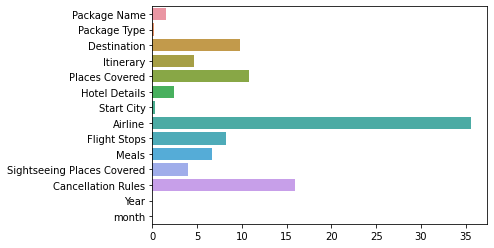

In [91]:
sns.barplot(CB.feature_importances_, CB.feature_names_)

Airline,Destination,Meals,Month,Destination,PlacesCovered,cancellationRules

Again pass the X an y into train test split for trainig again on the model using new selected features

In [92]:
##X = df_train.drop(columns=['Package Name','Year','month',	'Package Type','Places Covered','Travel Date','Hotel Details','Start City','Per Person Price'])
#print('Shape:',X.shape)
#X.head(2)

In [93]:
#target variable Y
#y=df_train['Per Person Price']
#print('Shape:',y.shape)

**Test Data PreProcessing**

In [94]:
print('Shape:',test.shape)
test.head(2)

Shape: (9000, 14)


,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules
0,12c47aefbcca65d6156ba0bc7946704b,Goa 5N stay with flights & Transfers-North Goa,Luxury,Goa,5N Goa,Goa,13-07-2021,Novotel Goa Resort & Spa:4.1,New Delhi,IndiGo,0,4,Not Available,Cancellation any time after making the 1st pay...
1,156febf7d27315ae9f210ed13bca3ac2,Into the Wild - Weekend at Bandipur National Park,Luxury,Bandipur,2N Bandipur,Bandipur,20-03-2021,The Windflower Jungle Resorts & Spa Bandipur:4.4,New Delhi,Not Available,0,4,Bandipur National Park,This cancellation policy is applicable for boo...


In [95]:
test['Travel Date'] = pd.to_datetime(test['Travel Date'])

In [96]:
test['Year']=pd.DatetimeIndex(test['Travel Date']).year
test['month']=pd.DatetimeIndex(test['Travel Date']).month

In [97]:
df_test = test.drop(columns=['Uniq Id','Travel Date'])
print('shape:',df_test.shape)
df_test.head(2)

shape: (9000, 14)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,Goa 5N stay with flights & Transfers-North Goa,Luxury,Goa,5N Goa,Goa,Novotel Goa Resort & Spa:4.1,New Delhi,IndiGo,0,4,Not Available,Cancellation any time after making the 1st pay...,2021,7
1,Into the Wild - Weekend at Bandipur National Park,Luxury,Bandipur,2N Bandipur,Bandipur,The Windflower Jungle Resorts & Spa Bandipur:4.4,New Delhi,Not Available,0,4,Bandipur National Park,This cancellation policy is applicable for boo...,2021,3


In [98]:
cat_col = df_test.select_dtypes('object')
cat_col.columns

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Hotel Details', 'Start City', 'Airline',
       'Sightseeing Places Covered', 'Cancellation Rules'],
      dtype='object')

In [99]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_col:
  df_test[col] = lb.fit_transform(df_test[col])

In [100]:
print('shape:',df_test.shape)
df_test.head(2)

shape: (9000, 14)


,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,797,2,177,918,178,1959,1,80,0,4,1475,0,2021,7
1,1003,2,39,308,40,3442,1,147,0,4,66,6,2021,3


In [101]:
from sklearn.preprocessing import StandardScaler,RobustScaler
rs = RobustScaler()
for c in df_test.columns:
    df_test[c] = rs.fit_transform(df_test[c].values.reshape(-1, 1))
df_test.head()

,Package Name,Package Type,Destination,Itinerary,Places Covered,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Year,month
0,-0.172887,-0.333333,-0.407609,0.884701,-0.407609,0.003156,0.0,-0.87013,-0.5,0.5,0.826435,0.0,0.0,0.2
1,0.025524,-0.333333,-0.907609,-0.467849,-0.907609,0.939246,0.0,0.00000,-0.5,0.5,-1.054740,6.0,0.0,-0.6
2,0.958825,0.333333,0.088768,0.583149,0.088768,0.000000,0.0,0.00000,0.5,0.0,0.196262,6.0,1.0,0.6
3,0.368408,-0.666667,0.088768,0.583149,0.088768,0.000000,-1.0,0.00000,0.0,0.0,0.624833,6.0,0.0,-0.2
4,0.791235,-0.333333,-0.733696,-1.011086,-0.733696,-1.112829,0.0,-0.87013,-0.5,0.5,-0.371162,0.0,0.0,0.8


In [102]:
prediction = CB.predict(df_test)
prediction

array([ 9.94474444,  9.43672183,  8.94740195, ..., 10.19603415,
        9.93126384,  9.60019041])

In [103]:
print('shape:',submission.shape)
submission.head()

shape: (9000, 1)


,Per Person Price
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [104]:
Predict=np.exp(prediction)
#Predict=Predict.astype(int)

In [105]:
submission = pd.DataFrame({'Per Person Price':Predict})
submission.head()

,Per Person Price
0,20842.395530
1,12540.539414
2,7687.892341
3,8475.789186
4,20397.678398


In [ ]:
submission.to_csv('sub_CB-2.csv',index=False)

In [ ]:
cb_1=pd.read_csv("sub_CB-2.csv")
cb_1.head()

,Per Person Price
0,22917
1,12088
2,6225
3,9525
4,26493
